# **Food Delivery Time Prediction**

**Importing necessary libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

**Loading DataSet**

In [2]:
df = pd.read_csv('/content/deliverytime.txt')
df.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Type_of_order,Type_of_vehicle,Time_taken(min)
0,4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,Snack,motorcycle,24
1,B379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,Snack,scooter,33
2,5D6D,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,Drinks,motorcycle,26
3,7A6A,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,Buffet,motorcycle,21
4,70A2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,Snack,scooter,30


**Checking Info**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45593 entries, 0 to 45592
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           45593 non-null  object 
 1   Delivery_person_ID           45593 non-null  object 
 2   Delivery_person_Age          45593 non-null  int64  
 3   Delivery_person_Ratings      45593 non-null  float64
 4   Restaurant_latitude          45593 non-null  float64
 5   Restaurant_longitude         45593 non-null  float64
 6   Delivery_location_latitude   45593 non-null  float64
 7   Delivery_location_longitude  45593 non-null  float64
 8   Type_of_order                45593 non-null  object 
 9   Type_of_vehicle              45593 non-null  object 
 10  Time_taken(min)              45593 non-null  int64  
dtypes: float64(5), int64(2), object(4)
memory usage: 3.8+ MB


**Checking null values**

In [4]:
df.isnull().sum()

ID                             0
Delivery_person_ID             0
Delivery_person_Age            0
Delivery_person_Ratings        0
Restaurant_latitude            0
Restaurant_longitude           0
Delivery_location_latitude     0
Delivery_location_longitude    0
Type_of_order                  0
Type_of_vehicle                0
Time_taken(min)                0
dtype: int64

There are no null values so lets move on !

**Calculating Distance Between Two Latitudes and Longitudes**

We can use the haversine formula to calculate the distance between two locations based on their latitudes and longitudes.

In [5]:
R = 6371

def deg_to_rad(degrees):
    return degrees * (np.pi/180)

def distcalculate(lat1, lon1, lat2, lon2):
    d_lat = deg_to_rad(lat2 - lat1)
    d_lon = deg_to_rad(lon2 - lon1)
    a = np.sin(d_lat / 2) ** 2 + np.cos(deg_to_rad(lat1)) * np.cos(deg_to_rad(lat2)) * np.sin(d_lon / 2) ** 2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
    return R * c

df['distance'] = distcalculate(df['Restaurant_latitude'], df['Restaurant_longitude'],
                               df['Delivery_location_latitude'], df['Delivery_location_longitude'])


We added a new column called distance !

# **Data Exploration**

**Relationship between the distance and time taken to deliver the food**

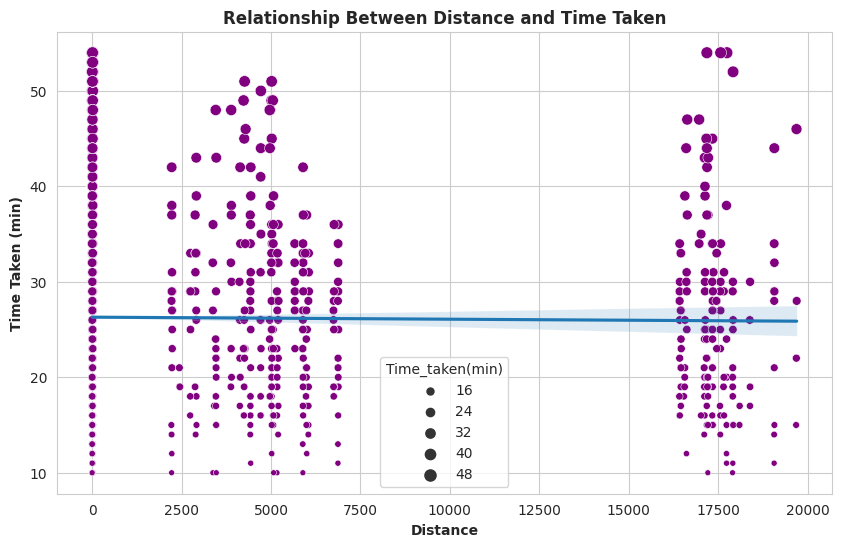

In [6]:
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")

sns.scatterplot(data=df, x="distance", y="Time_taken(min)", size="Time_taken(min)", color = 'purple')
sns.regplot(data=df, x="distance", y="Time_taken(min)", scatter=False)

plt.title("Relationship Between Distance and Time Taken", fontweight='bold')
plt.xlabel("Distance", fontweight='bold')
plt.ylabel("Time Taken (min)", fontweight='bold')
plt.show()

It means that most delivery partners deliver food within 25-30 minutes, regardless of distance.

**Time taken to deliver the food and the age of the delivery partner:**

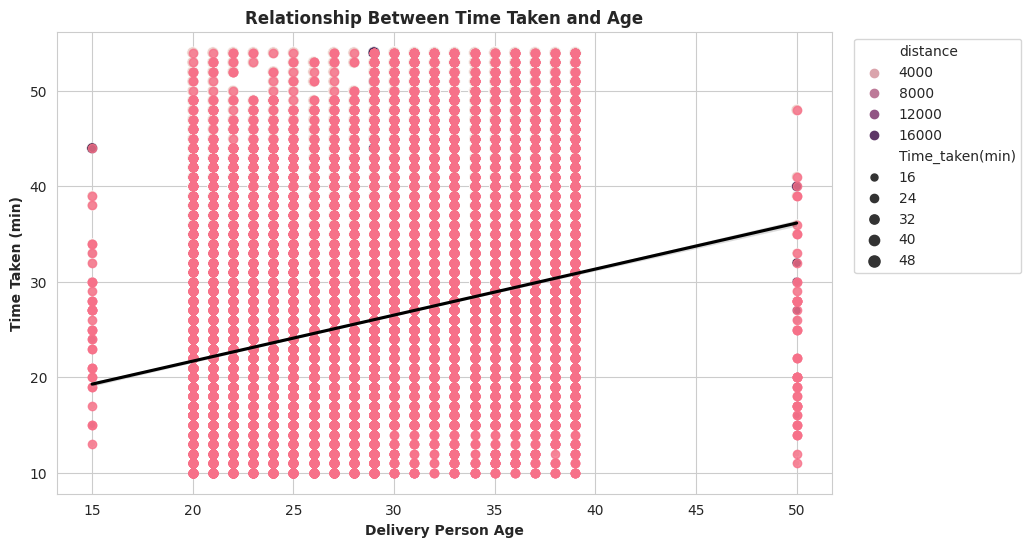

In [7]:
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")
sns.set_palette("husl")

sns.scatterplot(data=df, x="Delivery_person_Age", y="Time_taken(min)", size="Time_taken(min)", hue="distance")
sns.regplot(data=df, x="Delivery_person_Age", y="Time_taken(min)", line_kws={"color": "black"})

plt.title("Relationship Between Time Taken and Age", fontweight='bold')
plt.xlabel("Delivery Person Age", fontweight='bold')
plt.ylabel("Time Taken (min)", fontweight='bold')

plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left')

plt.show()

It means young delivery partners take less time to deliver the food compared to the elder partners.

**Relationship between the time taken to deliver the food and the ratings of the delivery partner**

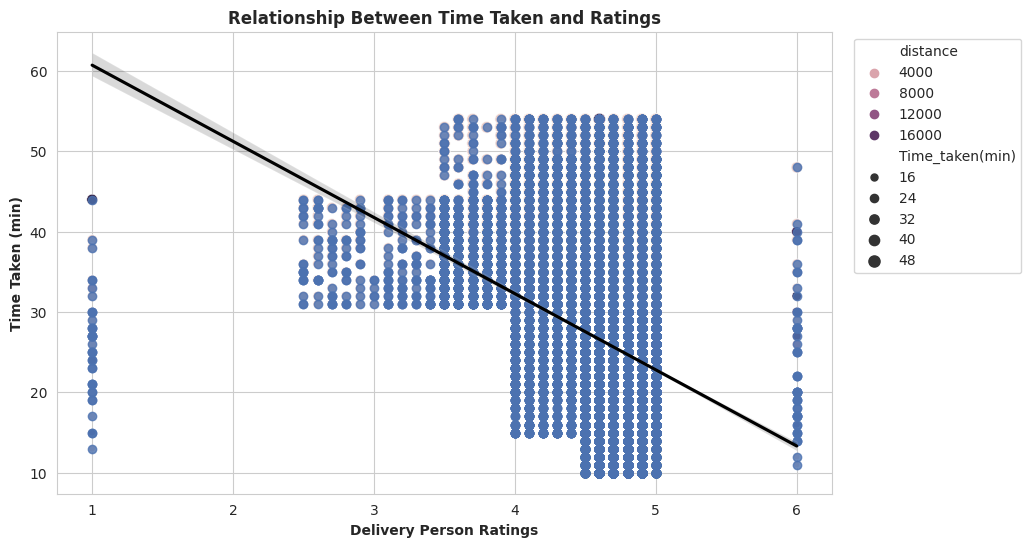

In [8]:
sns.set_palette("deep")

plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")

scatter_plot = sns.scatterplot(data=df, x="Delivery_person_Ratings", y="Time_taken(min)", size="Time_taken(min)", hue="distance")
sns.regplot(data=df, x="Delivery_person_Ratings", y="Time_taken(min)", line_kws={"color": "black"})

plt.title("Relationship Between Time Taken and Ratings", fontweight='bold')
plt.xlabel("Delivery Person Ratings", fontweight='bold')
plt.ylabel("Time Taken (min)", fontweight='bold')

plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left')

plt.show()

It means delivery partners with higher ratings take less time to deliver the food compared to partners with low ratings.

**Does the type of food ordered by the customer and the type of vehicle used by the delivery partner affects the delivery time or not ?**

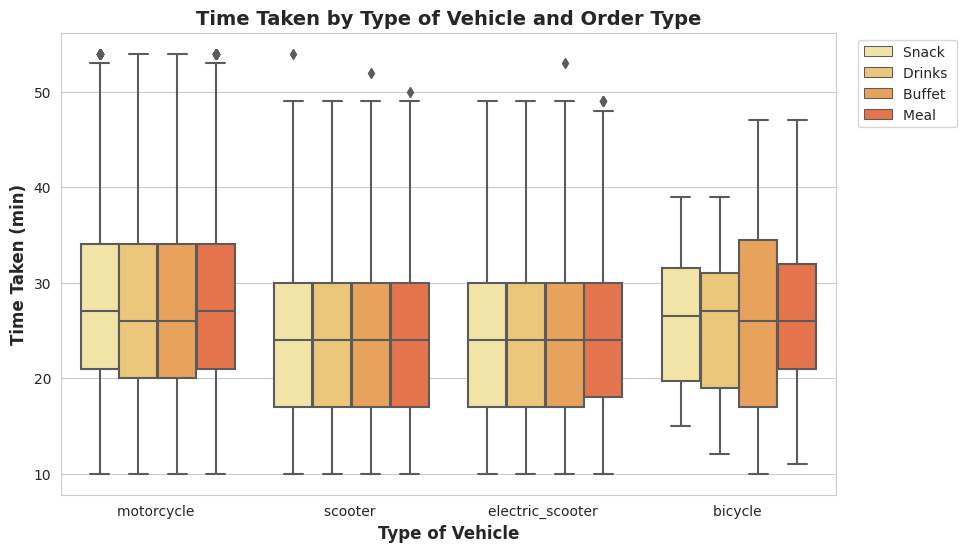

In [9]:
sns.set_palette("YlOrRd")

plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")
sns.boxplot(data=df, x="Type_of_vehicle", y="Time_taken(min)", hue="Type_of_order")

plt.title("Time Taken by Type of Vehicle and Order Type", fontsize=14, fontweight='bold')
plt.xlabel("Type of Vehicle", fontsize=12, fontweight='bold')
plt.ylabel("Time Taken (min)", fontsize=12, fontweight='bold')
plt.legend(title="Type of Order")


plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left')

plt.show()

There is not much difference between the time taken by delivery partners depending on the vehicle they are driving and the type of food they are delivering.

# **Food Delivery Time Prediction Model**

In [12]:
x = df[["Delivery_person_Age", "Delivery_person_Ratings", "distance"]]
y = df["Time_taken(min)"]
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.10, random_state=42)

In [13]:
scaler = StandardScaler()
xtrain_scaled = scaler.fit_transform(xtrain)
xtest_scaled = scaler.transform(xtest)

In [14]:
model = LinearRegression()
model.fit(xtrain_scaled, ytrain)

LinearRegression()

**Prediction**

In [18]:
print("Food Delivery Time Prediction")
a = int(input("Age of Delivery Partner: "))
b = float(input("Ratings of Previous Deliveries: "))
c = int(input("Total Distance: "))

Food Delivery Time Prediction
Age of Delivery Partner: 34
Ratings of Previous Deliveries: 3.4
Total Distance: 22


In [19]:
features = [[a, b, c]]
features_scaled = scaler.transform(features)
predicted_time = model.predict(features_scaled)
print("Predicted Delivery Time in Minutes =", predicted_time)

Predicted Delivery Time in Minutes = [39.2862702]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


**Done By SYED MIRAN HUSSAIN**